We are going to analyse a document at our disposal that contains hyperlinks to PDFs. We would like to know something about this dataset in preparation for some RPA processes. We may be interested to know:

1. Hyperlink distribution.  
    Do they have the same base url?  
        If so, this might mean less variance in PDF structure (the easy case).

In [4]:
import pandas as pd

## Exploratory Analysis

In [5]:
data = pd.read_excel("data/AI Automation Project.xlsx")

In [6]:
data.head(2)

,index_new,index_old,document_id,company_id,name_comp,country,year,comment,href_doc,mda_begin,...,fs_begin,fs_end,audit_begin,audit_end,status,manually_merged_document,description_problem,no_hit_checked,hits_checked,download_problems
0,0,0.0,NaN,013fe637-396a-45a9-84aa-15fdaceab849,Bank Pekao,Poland,2018,updated fs_begin & fs_end,https://www.dropbox.com/scl/fi/fywjtk4nbzbg19p...,NaN,...,3,183,186,194,NaN,YES,separate documents for fs and audit,NaN,NaN,NaN
1,1,1.0,8691c8f9-c07e-459e-989e-de3b0cdb6fda,013fe637-396a-45a9-84aa-15fdaceab849,Bank Pekao,Poland,2019,updated fs_begin & fs_end,https://www.dropbox.com/scl/fi/7zph7b0hhoc8y1f...,NaN,...,3,184,187,195,NaN,YES,separate documents for fs and audit,NaN,NaN,NaN


In [7]:
data.shape

(3020, 21)

In [8]:
h_data = data.href_doc

In [9]:
len(h_data.unique())

2730

### Missing Values

In [25]:
missing = h_data.isna()
missing.sum()

-191

In [28]:
# The tilda flips true to false so we keep the non missing data
h_data_ = h_data[~missing]
h_data_

0       https://www.dropbox.com/scl/fi/fywjtk4nbzbg19p...
1       https://www.dropbox.com/scl/fi/7zph7b0hhoc8y1f...
2       https://www.dropbox.com/scl/fi/tac8efxarvhc4cg...
3       https://www.dropbox.com/scl/fi/evy9rgz5p40i03y...
4       https://www.dropbox.com/scl/fi/5988ou1lsj9vg4r...
                              ...                        
3012    https://www.siemensgamesa.com/-/media/siemensg...
3013    https://www.siemensgamesa.com/en-int/-/media/s...
3015    https://www.atlantia.com/documents/37344/19820...
3016    https://www.atlantia.com/documents/37344/19821...
3019    https://www.mundys.com/documents/37344/798825/...
Name: href_doc, Length: 2830, dtype: object

### Find Unique URLS

In [29]:
import re
from urllib.parse import urlparse

In [30]:

def get_base_urls(urls):
    base_urls = []
    for url in urls:
        try:
            parsed = urlparse(url)
            base_url = parsed.scheme + '://' + parsed.netloc
            base_urls.append(base_url)
        except AttributeError:
            print('AttributeError: {}'.format(url))
            continue
    
    return base_urls


In [33]:
base_urls = get_base_urls(h_data_)

### Unique Frequencies

List the unique domain types.

In [47]:
# Get unique values and frequencies
domain_frequencies = pd.DataFrame(pd.Series(base_urls).value_counts()) 

# Reset index to make values a column
domain_frequencies = domain_frequencies.reset_index()

# Rename columns
domain_frequencies.columns = ['unique', 'frequency']
domain_frequencies.head()

,unique,frequency
0,https://www.annualreports.com,183
1,https://mb.cision.com,36
2,://,30
3,https://www.dropbox.com,26
4,https://www.google.com,16


In [39]:
len(base_urls_unique)

718

#### Remarks
There are over 700 domain types in our dataset. This informs us that our data is quite varied and so may be the nature of our PDFs.

### Visualization

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

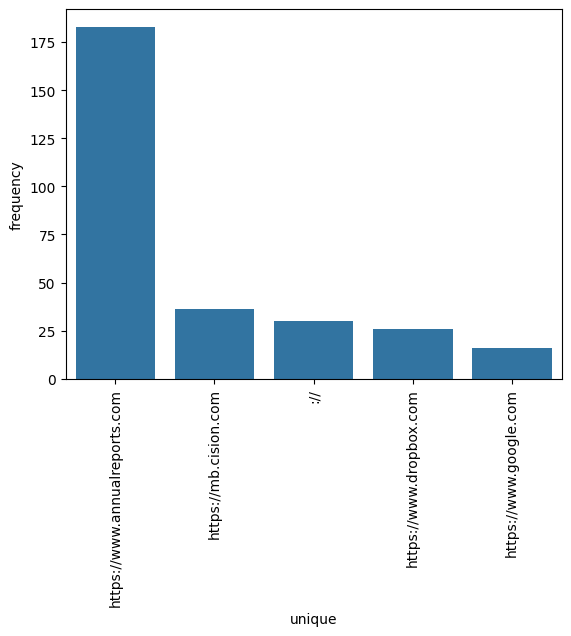

In [59]:
df = domain_frequencies.head()

sns.barplot(x='unique', y='frequency', data=df)
plt.xticks(rotation=90)
plt.show()

#### Remarks
Now that we are aware of the most frequent domain types, we can turn our attention to those first before knocking down the rest.